In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from sklearn.tree import DecisionTreeRegressor


In [3]:
# Load your dataset
df = pd.read_csv("student_performance_dataset.csv")  # Change path if needed

print("✅ Dataset Loaded Successfully!")
print(df.head())
print(df.info())
print(df.describe())


✅ Dataset Loaded Successfully!
   Hours_Studied  Attendance  Previous_Score  Assignments_Completed  \
0              7          84              67                      6   
1              4          86              53                      7   
2              8          96              40                      2   
3              5          63              45                      2   
4              7          52              88                      1   

   Participation  Health_Issues  Parental_Support  Final_Score  
0              1              1                 1        100.0  
1              1              1                 1         91.6  
2              1              0                 1        100.0  
3              0              0                 1         89.6  
4              1              0                 1        100.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype

In [4]:
# Features (X) and Target (y)
X = df.drop("Final_Score", axis=1)
y = df["Final_Score"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split Done!")


✅ Data Split Done!


In [5]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

print("✅ Decision Tree Model Trained Successfully!")


✅ Decision Tree Model Trained Successfully!


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Train a Regression Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")


✅ Model Trained Successfully!


In [7]:
# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error (MAE): 2.46
Root Mean Squared Error (RMSE): 4.10
R² Score: 0.76


In [8]:
# --- Linear Regression ---
from sklearn.linear_model import LinearRegression

# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data to evaluate
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\n📊 Linear Regression Results")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")



📊 Linear Regression Results
MAE: 6.10
RMSE: 7.12
R²: 0.29


In [9]:
# Predict on test data
dt_pred = dt_model.predict(X_test)

# Evaluation Metrics
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("📊 Decision Tree Regression Results on Test Set")
print(f"MAE: {dt_mae:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"R²: {dt_r2:.2f}")


📊 Decision Tree Regression Results on Test Set
MAE: 4.63
RMSE: 8.44
R²: 0.00


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # compute RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 2.46
Root Mean Squared Error (RMSE): 4.10
R² Score: 0.76


In [11]:
# Enter New Student Data
# [Hours_Studied, Attendance, Previous_Score, Assignments_Completed, Participation, Health_Issues, Parental_Support]
new_student = [[6, 85, 78, 8, 1, 0, 1]]

predicted_score = model.predict(new_student)[0]

# Calculate CGPA & Grade
predicted_cgpa = round(predicted_score / 10, 1)

if predicted_score >= 90:
    grade = "A+"
elif predicted_score >= 80:
    grade = "A"
elif predicted_score >= 70:
    grade = "B+"
elif predicted_score >= 60:
    grade = "B"
elif predicted_score >= 50:
    grade = "C"
else:
    grade = "F"

print(f"🎯 Predicted Final Score: {predicted_score:.1f}/100")
print(f"🎓 Predicted CGPA: {predicted_cgpa}")
print(f"🏅 Predicted Grade: {grade}")


🎯 Predicted Final Score: 99.7/100
🎓 Predicted CGPA: 10.0
🏅 Predicted Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


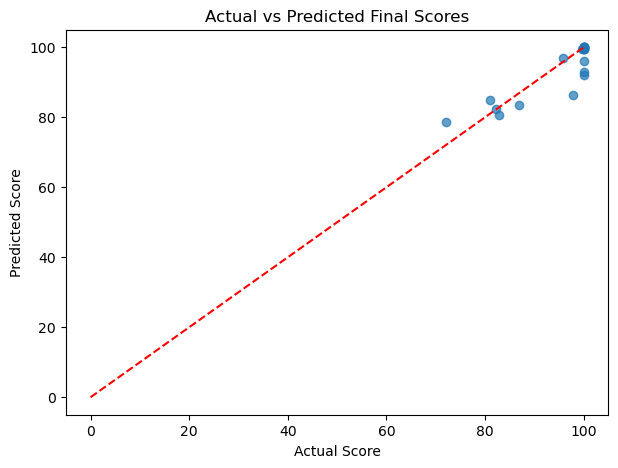

In [12]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 100], [0, 100], '--', color='red')  # perfect prediction line
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Final Scores")
plt.show()


In [13]:
def predict_student_performance(data, name="Unknown Student"):
    score = model.predict([data])[0]
    cgpa = round(score / 10, 1)
    grade = "A+" if score >= 90 else "A" if score >= 80 else "B+" if score >= 70 else "B" if score >= 60 else "C" if score >= 50 else "F"
    
    print(f"Prediction for {name}:")
    print(f"🎯 Final Score: {score:.1f}/100")
    print(f"🎓 CGPA: {cgpa}")
    print(f"🏅 Grade: {grade}\n")

# Example usage:
predict_student_performance([6, 85, 78, 8, 1, 0, 1], "Rahul Sharma")
predict_student_performance([3, 60, 50, 4, 0, 1, 0], "Priya Singh")


Prediction for Rahul Sharma:
🎯 Final Score: 99.7/100
🎓 CGPA: 10.0
🏅 Grade: A+

Prediction for Priya Singh:
🎯 Final Score: 72.5/100
🎓 CGPA: 7.3
🏅 Grade: B+



C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
#### Function to predict student performance
def predict_student_performance():
    print("Enter the following details for the student:")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data for prediction
    new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]
    
    # Predict final score
    predicted_score = model.predict(new_student)[0]
    predicted_cgpa = round(predicted_score / 10, 1)
    
    # Assign Grade
    if predicted_score >= 90:
        grade = "A+"
    elif predicted_score >= 80:
        grade = "A"
    elif predicted_score >= 70:
        grade = "B+"
    elif predicted_score >= 60:
        grade = "B"
    elif predicted_score >= 50:
        grade = "C"
    else:
        grade = "F"
    
    # Show results
    print("\n🎯 Prediction for", student_name)
    print(f"Final Score: {predicted_score:.1f}/100")
    print(f"CGPA: {predicted_cgpa}")
    print(f"Grade: {grade}")

# Run the function
predict_student_performance()


Enter the following details for the student:


Hours Studied per day:  4
Attendance percentage:  98
Previous Score (0-100):  96
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  Rishi



🎯 Prediction for Rishi
Final Score: 95.5/100
CGPA: 9.5
Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Enter the following details for the student:


Hours Studied per day:  2
Attendance percentage:  98
Previous Score (0-100):  97
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  Om



🎯 Prediction for Om
Final Score: 91.0/100
CGPA: 9.1
Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


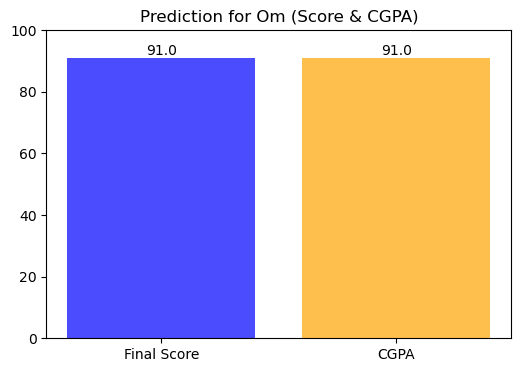

In [16]:
import matplotlib.pyplot as plt

# Function to predict student performance with graph
def predict_student_performance_graph():
    print("Enter the following details for the student:")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data for prediction
    new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]
    
    # Predict final score
    predicted_score = model.predict(new_student)[0]
    predicted_cgpa = round(predicted_score / 10, 1)
    
    # Assign Grade
    if predicted_score >= 90:
        grade = "A+"
    elif predicted_score >= 80:
        grade = "A"
    elif predicted_score >= 70:
        grade = "B+"
    elif predicted_score >= 60:
        grade = "B"
    elif predicted_score >= 50:
        grade = "C"
    else:
        grade = "F"
    
    # Show results
    print("\n🎯 Prediction for", student_name)
    print(f"Final Score: {predicted_score:.1f}/100")
    print(f"CGPA: {predicted_cgpa}")
    print(f"Grade: {grade}")
    
    # --- Graph for this student ---
    labels = ['Final Score', 'CGPA']
    values = [predicted_score, predicted_cgpa * 10]  # scale CGPA to 100 for visual
    
    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['blue','orange'], alpha=0.7)
    plt.ylim(0, 100)
    
    # Add value labels on top
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')
    
    plt.title(f"Prediction for {student_name} (Score & CGPA)")
    plt.show()

# Run the interactive function
predict_student_performance_graph()


Enter the following details for the student:


Hours Studied per day:  2
Attendance percentage:  96
Previous Score (0-100):  99
Assignments Completed:  3
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  om



🎯 Prediction for om
Final Score: 91.0/100
CGPA: 9.1
Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


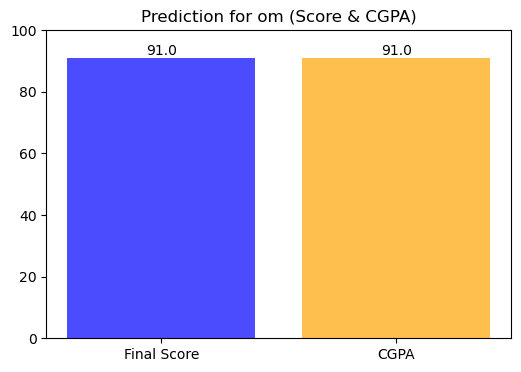

In [17]:
import matplotlib.pyplot as plt

# Function to predict student performance with graph
def predict_student_performance_graph():
    print("Enter the following details for the student:")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data for prediction
    new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]
    
    # Predict final score
    predicted_score = model.predict(new_student)[0]
    predicted_cgpa = round(predicted_score / 10, 1)
    
    # Assign Grade
    if predicted_score >= 90:
        grade = "A+"
    elif predicted_score >= 80:
        grade = "A"
    elif predicted_score >= 70:
        grade = "B+"
    elif predicted_score >= 60:
        grade = "B"
    elif predicted_score >= 50:
        grade = "C"
    else:
        grade = "F"
    
    # Show results
    print("\n🎯 Prediction for", student_name)
    print(f"Final Score: {predicted_score:.1f}/100")
    print(f"CGPA: {predicted_cgpa}")
    print(f"Grade: {grade}")
    
    # --- Graph for this student ---
    labels = ['Final Score', 'CGPA']
    values = [predicted_score, predicted_cgpa * 10]  # scale CGPA to 100 for visual
    
    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['blue','orange'], alpha=0.7)
    plt.ylim(0, 100)
    
    # Add value labels on top
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')
    
    plt.title(f"Prediction for {student_name} (Score & CGPA)")
    plt.show()

# Run the interactive function
predict_student_performance_graph()

Enter the following details for the student (Linear Regression):


Hours Studied per day:  2
Attendance percentage:  99
Previous Score (0-100):  98
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  om



🎯 Prediction for om
Final Score: 94.5/100
CGPA: 9.5
Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


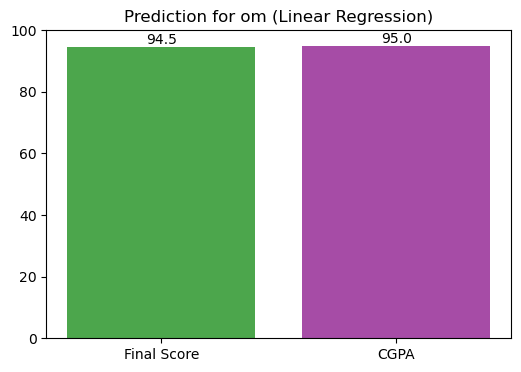

In [18]:
import matplotlib.pyplot as plt

# Function to predict student performance using Linear Regression with graph
def predict_student_performance_graph_lr():
    print("Enter the following details for the student (Linear Regression):")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data for prediction
    new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]
    
    # Predict final score using Linear Regression
    predicted_score = lr_model.predict(new_student)[0]
    predicted_cgpa = round(predicted_score / 10, 1)
    
    # Assign Grade
    if predicted_score >= 90:
        grade = "A+"
    elif predicted_score >= 80:
        grade = "A"
    elif predicted_score >= 70:
        grade = "B+"
    elif predicted_score >= 60:
        grade = "B"
    elif predicted_score >= 50:
        grade = "C"
    else:
        grade = "F"
    
    # Show results
    print("\n🎯 Prediction for", student_name)
    print(f"Final Score: {predicted_score:.1f}/100")
    print(f"CGPA: {predicted_cgpa}")
    print(f"Grade: {grade}")
    
    # --- Graph ---
    labels = ['Final Score', 'CGPA']
    values = [predicted_score, predicted_cgpa * 10]  # scale CGPA to 100

    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['green','purple'], alpha=0.7)
    plt.ylim(0, 100)
    
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')
    
    plt.title(f"Prediction for {student_name} (Linear Regression)")
    plt.show()

# Run the Linear Regression prediction function
predict_student_performance_graph_lr()


Enter the following details for the student:


Hours Studied per day:  2
Attendance percentage:  99
Previous Score (0-100):  98
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  om


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



🎯 Prediction for om:
Random Forest → Score: 91.0/100, CGPA: 9.1, Grade: A+
Linear Regression → Score: 94.5/100, CGPA: 9.5, Grade: A+


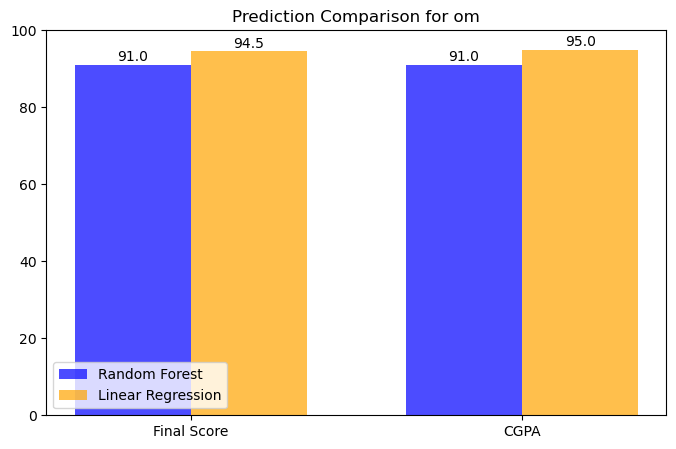

In [19]:
import matplotlib.pyplot as plt

# Unified prediction function for both Random Forest & Linear Regression
def predict_student_performance_compare():
    print("Enter the following details for the student:")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data
    new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]

    # --- Predictions ---
    # Random Forest
    rf_score = model.predict(new_student)[0]
    rf_cgpa = round(rf_score / 10, 1)
    if rf_score >= 90: rf_grade = "A+"
    elif rf_score >= 80: rf_grade = "A"
    elif rf_score >= 70: rf_grade = "B+"
    elif rf_score >= 60: rf_grade = "B"
    elif rf_score >= 50: rf_grade = "C"
    else: rf_grade = "F"

    # Linear Regression
    lr_score = lr_model.predict(new_student)[0]
    lr_cgpa = round(lr_score / 10, 1)
    if lr_score >= 90: lr_grade = "A+"
    elif lr_score >= 80: lr_grade = "A"
    elif lr_score >= 70: lr_grade = "B+"
    elif lr_score >= 60: lr_grade = "B"
    elif lr_score >= 50: lr_grade = "C"
    else: lr_grade = "F"

    # --- Show Results ---
    print(f"\n🎯 Prediction for {student_name}:")
    print(f"Random Forest → Score: {rf_score:.1f}/100, CGPA: {rf_cgpa}, Grade: {rf_grade}")
    print(f"Linear Regression → Score: {lr_score:.1f}/100, CGPA: {lr_cgpa}, Grade: {lr_grade}")

    # --- Graphs ---
    labels = ['Final Score', 'CGPA']
    rf_values = [rf_score, rf_cgpa * 10]
    lr_values = [lr_score, lr_cgpa * 10]

    x = np.arange(len(labels))  # label positions
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,5))
    bars1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='blue', alpha=0.7)
    bars2 = ax.bar(x + width/2, lr_values, width, label='Linear Regression', color='orange', alpha=0.7)

    # Add value labels on top
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')

    ax.set_ylim(0, 100)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(f"Prediction Comparison for {student_name}")
    ax.legend()
    plt.show()

# Run the unified function
predict_student_performance_compare()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Random Forest Predictions ---
rf_pred = model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# --- Linear Regression Predictions ---
lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# --- Print Comparison ---
print("📊 Model Accuracy Comparison on Test Set")
print(f"Random Forest → MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"Linear Regression → MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")


📊 Model Accuracy Comparison on Test Set
Random Forest → MAE: 2.46, RMSE: 4.10, R²: 0.76
Linear Regression → MAE: 6.10, RMSE: 7.12, R²: 0.29


In [21]:
# Example input: new_student = [[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]]
dt_score = dt_model.predict(new_student)[0]
dt_cgpa = round(dt_score / 10, 1)

# Assign Grade
if dt_score >= 90:
    dt_grade = "A+"
elif dt_score >= 80:
    dt_grade = "A"
elif dt_score >= 70:
    dt_grade = "B+"
elif dt_score >= 60:
    dt_grade = "B"
elif dt_score >= 50:
    dt_grade = "C"
else:
    dt_grade = "F"

print(f"Decision Tree → Score: {dt_score:.1f}/100, CGPA: {dt_cgpa}, Grade: {dt_grade}")


Decision Tree → Score: 100.0/100, CGPA: 10.0, Grade: A+


C:\Users\Vedant\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Enter the following details for the student (Decision Tree):


Hours Studied per day:  2
Attendance percentage:  99
Previous Score (0-100):  97
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  om



🎯 Prediction for om (Decision Tree)
Final Score: 97.7/100
CGPA: 9.8
Grade: A+


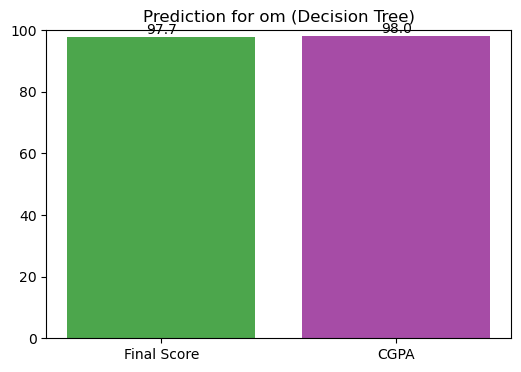

In [22]:
import matplotlib.pyplot as plt

# Function to predict student performance using Decision Tree
def predict_student_performance_dt():
    print("Enter the following details for the student (Decision Tree):")
    
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Prepare data as DataFrame with correct feature names
    new_student = pd.DataFrame([[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]],
                               columns=X_train.columns)

    # Predict final score using Decision Tree
    dt_score = dt_model.predict(new_student)[0]
    dt_cgpa = round(dt_score / 10, 1)

    # Assign Grade
    if dt_score >= 90:
        grade = "A+"
    elif dt_score >= 80:
        grade = "A"
    elif dt_score >= 70:
        grade = "B+"
    elif dt_score >= 60:
        grade = "B"
    elif dt_score >= 50:
        grade = "C"
    else:
        grade = "F"

    # Show results
    print(f"\n🎯 Prediction for {student_name} (Decision Tree)")
    print(f"Final Score: {dt_score:.1f}/100")
    print(f"CGPA: {dt_cgpa}")
    print(f"Grade: {grade}")

    # --- Optional Graph ---
    labels = ['Final Score', 'CGPA']
    values = [dt_score, dt_cgpa * 10]  # scale CGPA to 100

    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values, color=['green','purple'], alpha=0.7)
    plt.ylim(0, 100)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}", ha='center')

    plt.title(f"Prediction for {student_name} (Decision Tree)")
    plt.show()

# Run the function
predict_student_performance_dt()


Enter the following details for the student:


Hours Studied per day:  2
Attendance percentage:  100
Previous Score (0-100):  97
Assignments Completed:  2
Participation (1=Yes, 0=No):  1
Health Issues (1=Yes, 0=No):  0
Parental Support (1=Yes, 0=No):  0
Student Name:  om



🎯 Prediction for om:
Random Forest → Score: 91.0/100, CGPA: 9.1, Grade: A+
Linear Regression → Score: 94.6/100, CGPA: 9.5, Grade: A+
Decision Tree → Score: 97.7/100, CGPA: 9.8, Grade: A+


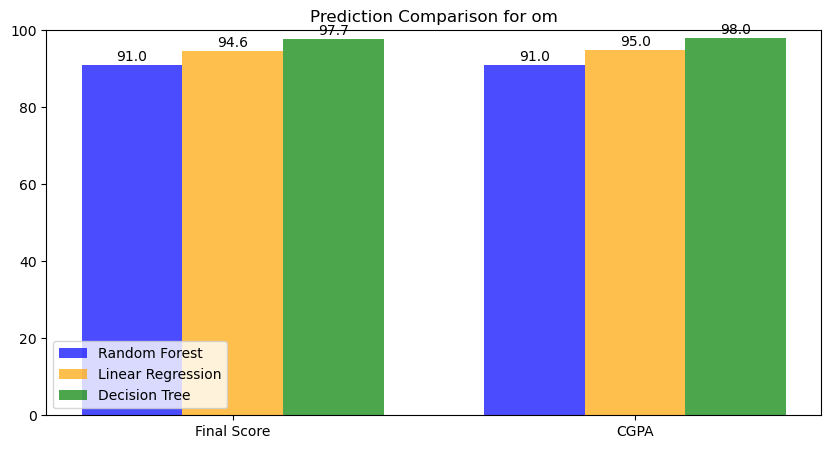

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to compare all three algorithms
def predict_student_performance_compare_all():
    print("Enter the following details for the student:")
    
    # Collect inputs
    hours = float(input("Hours Studied per day: "))
    attendance = float(input("Attendance percentage: "))
    previous_score = float(input("Previous Score (0-100): "))
    assignments = int(input("Assignments Completed: "))
    participation = int(input("Participation (1=Yes, 0=No): "))
    health_issues = int(input("Health Issues (1=Yes, 0=No): "))
    parental_support = int(input("Parental Support (1=Yes, 0=No): "))
    student_name = input("Student Name: ")

    # Convert input to DataFrame to match training features
    new_student = pd.DataFrame([[hours, attendance, previous_score, assignments, participation, health_issues, parental_support]],
                               columns=X_train.columns)

    # --- Predictions ---
    rf_score = model.predict(new_student)[0]
    lr_score = lr_model.predict(new_student)[0]
    dt_score = dt_model.predict(new_student)[0]

    # CGPA
    rf_cgpa, lr_cgpa, dt_cgpa = round(rf_score/10,1), round(lr_score/10,1), round(dt_score/10,1)

    # Grade function
    def assign_grade(score):
        if score >= 90: return "A+"
        elif score >= 80: return "A"
        elif score >= 70: return "B+"
        elif score >= 60: return "B"
        elif score >= 50: return "C"
        else: return "F"

    rf_grade, lr_grade, dt_grade = assign_grade(rf_score), assign_grade(lr_score), assign_grade(dt_score)

    # --- Show Results ---
    print(f"\n🎯 Prediction for {student_name}:")
    print(f"Random Forest → Score: {rf_score:.1f}/100, CGPA: {rf_cgpa}, Grade: {rf_grade}")
    print(f"Linear Regression → Score: {lr_score:.1f}/100, CGPA: {lr_cgpa}, Grade: {lr_grade}")
    print(f"Decision Tree → Score: {dt_score:.1f}/100, CGPA: {dt_cgpa}, Grade: {dt_grade}")

    # --- Graph ---
    labels = ['Final Score', 'CGPA']
    rf_values = [rf_score, rf_cgpa*10]
    lr_values = [lr_score, lr_cgpa*10]
    dt_values = [dt_score, dt_cgpa*10]

    x = np.arange(len(labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10,5))
    bars1 = ax.bar(x - width, rf_values, width, label='Random Forest', color='blue', alpha=0.7)
    bars2 = ax.bar(x, lr_values, width, label='Linear Regression', color='orange', alpha=0.7)
    bars3 = ax.bar(x + width, dt_values, width, label='Decision Tree', color='green', alpha=0.7)

    # Add values on top of bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, f"{bar.get_height():.1f}", ha='center')

    ax.set_ylim(0, 100)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(f"Prediction Comparison for {student_name}")
    ax.legend()
    plt.show()

# Run the comparison
predict_student_performance_compare_all()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Random Forest Predictions ---
rf_pred = model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# --- Linear Regression Predictions ---
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# --- Decision Tree Predictions ---
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

# --- Print Comparison ---
print("📊 Model Accuracy Comparison on Test Set")
print(f"Random Forest → MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"Linear Regression → MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")
print(f"Decision Tree → MAE: {dt_mae:.2f}, RMSE: {dt_rmse:.2f}, R²: {dt_r2:.2f}")


📊 Model Accuracy Comparison on Test Set
Random Forest → MAE: 2.46, RMSE: 4.10, R²: 0.76
Linear Regression → MAE: 6.10, RMSE: 7.12, R²: 0.29
Decision Tree → MAE: 4.63, RMSE: 8.44, R²: 0.00
